In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('heart.csv')


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

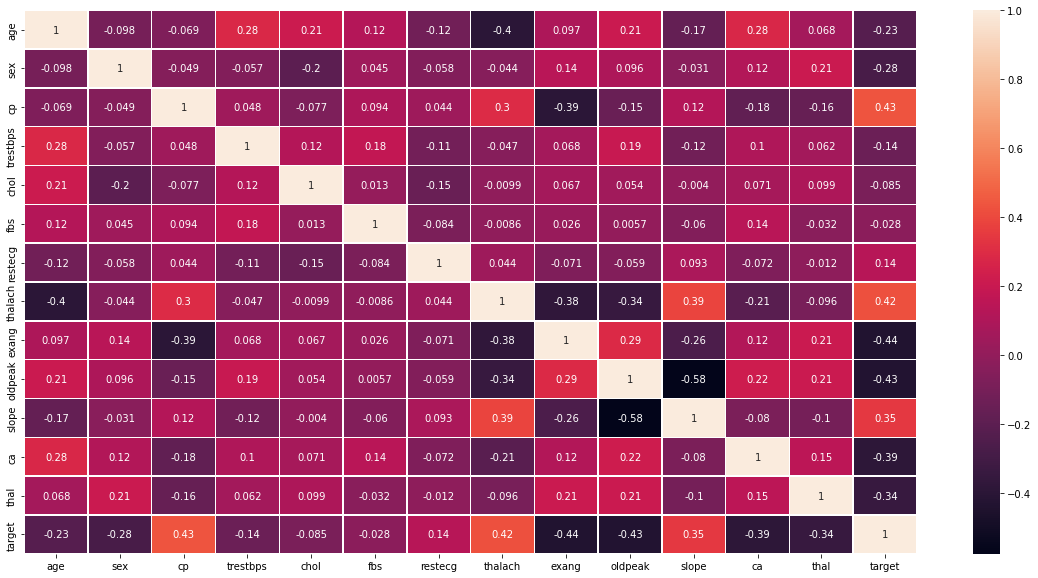

In [ ]:
import seaborn as sns
corrdf = df.corr('pearson')

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(corrdf, annot=True, linewidths=.5, ax=ax)

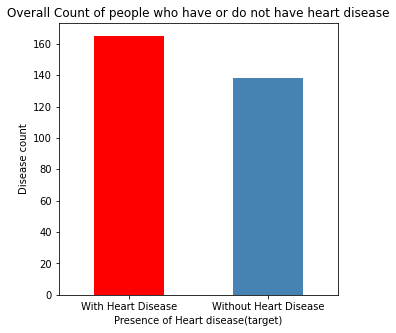

In [ ]:
disease_count = df['target'].value_counts()
disease_count.plot(kind='bar', color=['red','steelblue'],figsize=(5,5))
index = [0,1]
plt.xlabel('Presence of Heart disease(target)')
plt.ylabel('Disease count')
plt.xticks(index, ['With Heart Disease', 'Without Heart Disease'],rotation=0)
plt.title('Overall Count of people who have or do not have heart disease')
plt.show()

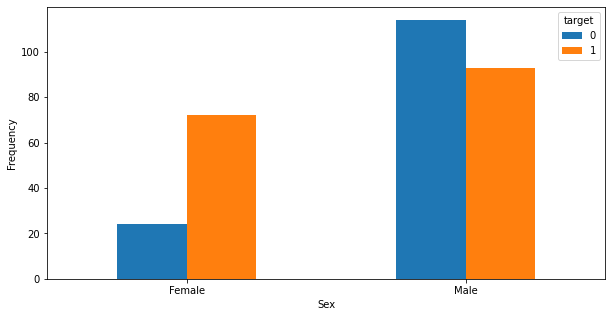

In [ ]:
sex_disease = df.groupby(['sex'])['target'].value_counts()
plot = sex_disease.loc(axis=0)[:,:]
index = [0,1]
p = plot.groupby(['sex','target']).sum().unstack()
p.plot(kind='bar',figsize=(10,5))
plt.xlabel('Sex')
plt.xticks(index, ['Female', 'Male'],rotation=0)
plt.ylabel('Frequency')
plt.show()



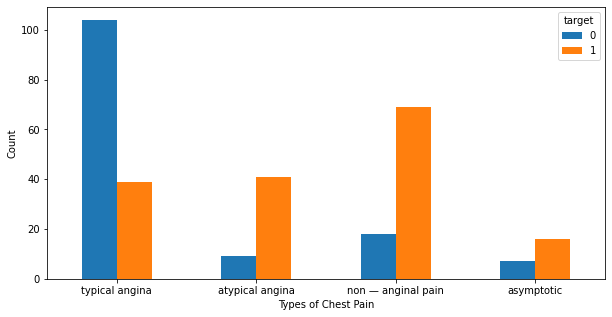

In [ ]:
cp = df.groupby(['cp'])['target'].value_counts()
plot = cp.loc(axis=0)[:,:]
index = [0,1,2,3]
p = plot.groupby(['cp','target']).sum().unstack()
p.plot(kind='bar',figsize=(10,5))
plt.xlabel('Types of Chest Pain')
plt.xticks(index,['typical angina','atypical angina','non — anginal pain', 'asymptotic'],rotation=0)
plt.ylabel('Count')
plt.show()



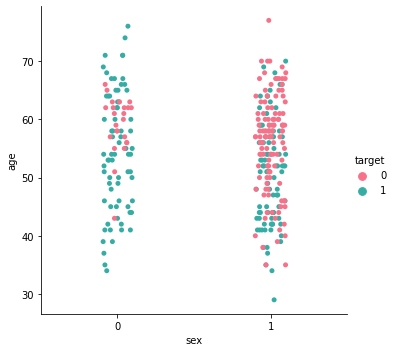

In [ ]:
sns.catplot(data=df,x='sex',y='age',hue='target',palette='husl')

Text(0.5, 1.0, 'SALES')

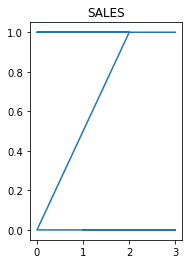

In [ ]:
#plot 1:
x = df['cp']
y = df['target']

plt.subplot(1, 2, 1)
plt.plot(x,y)
plt.title("SALES")

#plot 2:
# x = np.array([0, 1, 2, 3])
# y = np.array([10, 20, 30, 40])

# plt.subplot(1, 2, 2)
# plt.plot(x,y)
# plt.title("INCOME")

# plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [ ]:
X = df.drop("target", 1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=10)

In [ ]:
lr = LogisticRegression() 
model = lr.fit(X_train,y_train)
prediction1=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.7631578947368421